# Statistical inference from frequentist and Bayesian perspectives
In this short notebook we explore the problem of statistical hypothesis testing from a frequentist and Bayesian perspective. While most people with a degree in the sciences will be a little acquainted with the frequentist approach and its famous p-value, less well-known is its Bayesian counterpart, the Bayes' Factor. I am told that Bayesian statistics is often not even covered in many undergraduate degrees in statistics! This is a shame. Although the mathematics underpinning a Bayes's Factor for hypothesis testing can be several shades complexer than that underpinning the comparable p-value, the basic intuition behind it is not.

In the first part of the notebook we demonstrate, via simulation, the logic underpinning frequentist hypothesis testing and the calculation of the p-value. The second part does the same for the Bayes' Factor. In constructing the second part I leaned heavily on [this paper](https://doi.org/10.1177/2515245920972624), which I have been recommending to everyone recently. Throughtout we use the simple example of testing for a difference between two group means.

## Population vs sample
To properly understand the logic of inferential statistics two concepts need to be clear at the outset: the concepts of **sample** and **population**. The population is everybody to whom the findings need to be generalized, and the sample is the particular subset of the population which was measured as part of the experiment. For any quantity of interest in statistics (e.g. the mean) there is an (unknown) value in the population (usually notated using a character from the Greek alphabet) and a known value obtained from the sample (usually notated with a letter from the Latin alphabet) which will be different to the population value.

## Statistical inference: the frequentist perspective
### The alternative hypothesis

Let's say we want to know if the heights of people of Dutch descent differ on average from those of people of Flemish Belgian descent. We can formulate this research hypothesis as follows:

$$ H_{A}:  \mu_{D} - \mu_{F} \neq 0 $$

$H_{A}:$ is just standard notation for this so-called *alternative hypothesis*. The character $\mu_{D}$ represents the mean height of the Dutch **population** (that is of all Dutch people everywhere) and the character $\mu_{F}$ represents the mean height of the Flemish Belgian population. So all we are stating here is that we hypothesise the two means **in the population** are not equal.

Let's assume this is true and start the simulation. To do so I have selected two mean heights that are roughly (according tp google) the average heights of the two groups and specify a standard deviation that I made up completely.


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scpst
import math
# set up thw two populations, assume they are Gaussian with different means
mu_d = 176.5 # mean of the population of Dutch
sd_d = 10. # standard deviation of the population of Dutch

mu_f = 173.59 # mean of the population of Flemish Belgian
sd_f = 10. # standard deviation of the population of flemish belgian


If we could measure the height of every Dutch and every Flemish Belgian person we could calculate $\mu_{D}$ and $\mu_{A}$ and test the hypothesis directly. However, in practice we can't. We don't actually ever know $\mu_{D}$ and $\mu_{A}$, so we need to make an inference based on samples drawn from the two populations.

Lets assume we are very poor researchers and can only sample 10 Dutch and 10 Flemish people.


In [68]:
rng = np.random.default_rng(seed=12) # set up random number generator
np.random.seed(5) # also seed in the old way for sampling from distributions not supported by numpy.Generator


n_d = 10 # sample size of the Dutch
n_f = 10 # sample size of the Flemish

sample_d = rng.normal(loc=mu_d,scale=sd_d,size=n_d) # sample the heights of 10 Dutch
sample_f = rng.normal(loc=mu_f,scale=sd_f,size=n_f) # sample the heights of 10 Flemish

xbar_d = np.mean(sample_d) # mean height of the sample of Dutch
xbar_f = np.mean(sample_f) # mean height of the sample of Flemish
xbar_diff = xbar_d - xbar_f # difference between the two sample means

print('Mean height of Dutch sample = '+str(xbar_d))
print('Mean height of Flemish sample = '+str(xbar_f))
print('Difference in sample mean heights = '+str(xbar_diff))

Mean height of Dutch sample = 178.3614720207531
Mean height of Flemish sample = 175.5598796893783
Difference in sample mean heights = 2.801592331374792


So having taken our two samples we can see that the sample mean of the Dutch ($\bar{x_{D}}$) is greater than the mean of the Flemish ($\bar{x_{F}}$). But what can we then say about our hypothesis? What does this mean about the difference between the *population means*?

## Testing against the null hypothesis
The way statistical inference works in a frequentist paradigm is a little counter-intuitive, in that the probability of this alternative hypothesis (which is, in every situation I can imagine, the research hypothesis) is never directly quantified or measured. Instead we consider only the complement of the alternative hypothesis, the so-called *null hypothesis*, and to what degree our observations are consistent with it. In this case the null hypothesis ($H_{0}$) is that the two population means are equal .
$$H_{0}:\mu_{D} - \mu_{F} = 0 $$

To formulate a test it is investigated how the parameter of interest (in this case the difference in the means of two *samples* of the specified sizes) would vary, were the two *population* means equal (i.e. if the null hypothesis is true).

To simulate, we will sample many times from two identical populations and build up a *sampling distribution* of the difference between the sample means.


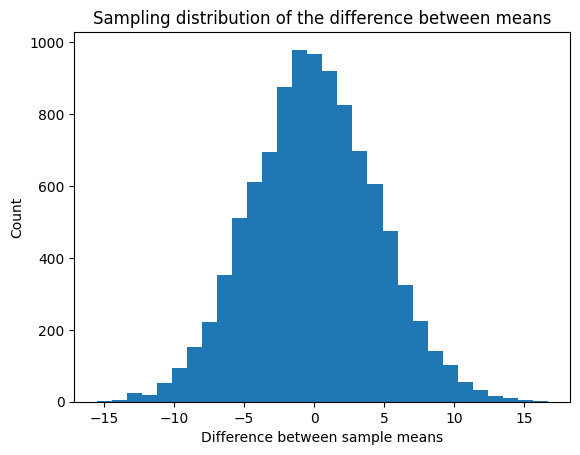

In [69]:
N_REPS = 10000

# sample 10 000 times from a population with a mean of zero
sample_a_null = [rng.normal(loc=0,scale=sd_d, size=n_d) for x in range(N_REPS)]
# sample another 10 000 times from a population with a mean of zero
sample_b_null = [rng.normal(loc=0,scale=sd_f, size=n_f) for x in range(N_REPS)]

# for each pair of samples calculate the difference between the two means
diff_distr_null =  np.array([np.mean(sample_a_null[x])-np.mean(sample_b_null[x]) for x in range(N_REPS)])

# plot the distribution of the results
plt.hist(diff_distr_null,bins = 30)
plt.title('Sampling distribution of the difference between means')
plt.xlabel('Difference between sample means')
plt.ylabel('Count')
plt.show()

This sampling distribution shows the values of the **sample** mean difference we would expect for our experiment if there was no difference in the **population** means.

The frequentists reason as follows: if our observed mean difference between the samples is unlikely to have occurred if the null hypothesis is true, then we reject the null hypothesis and, effectively, conclude in favour of the alternative. This is assessed by the (in)famous p-value. This is the proportion of the sampling distribution that is as or more extreme then the observed sample value. If this probability is low (typically < .05), the null hypothesis is rejected.


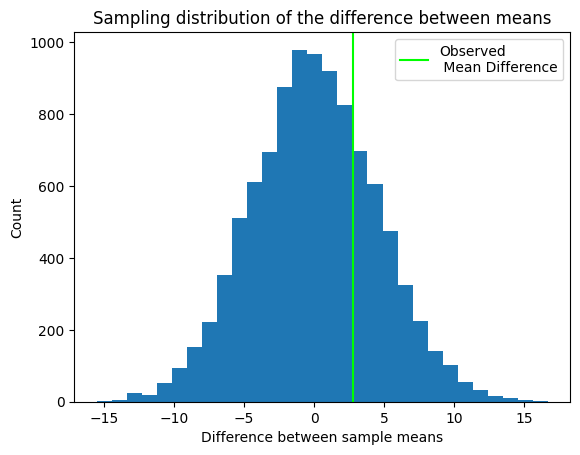

P value = 0.5272


In [70]:
# plot again and add a bar showing our observed mean difference
plt.hist(diff_distr_null,bins = 30)
l = plt.axvline(x=xbar_diff,c = [0,1,0])
plt.title('Sampling distribution of the difference between means')
plt.xlabel('Difference between sample means')
plt.ylabel('Count')
plt.legend([l],['Observed\n Mean Difference'])
plt.show()

# calculate the p value
p_val_mean_diff = np.sum(np.abs(diff_distr_null)>np.abs(xbar_diff)) / N_REPS
print('P value = '+ str(p_val_mean_diff))



In our example, the p-value is above this threshold so we cannot reject the null hypothesis.

## Mathematically more convenient test statistics
In practice, the difference between two means is not used as a test statistic. Although using simulations or resampling statostics any test statistic could be devised and tested in this way, before computers one had to rely on statistics for which the sampling distribution could be derived mathematically. For this reason, in practice, the most frequently used test statistic of the difference between two means is *t*. There are two versions of the *t* statistic: the so-called *Student's t* and *Welch's t* but the distinction is not important for the current discussion. The formula for *Student's t* is:

$$ t = \frac{\bar{x_{1}} - \bar{x_{2}}}{\sqrt{s^{2}_{P} (\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$$

where $\bar{x_{i}}$ and $n_{i}$ are the mean and sample size of the $i^{th}$ group respectively, $s^{2}_{P}$ is the *pooled variance*. This measures the dispersion in a sample and is the weighted mean of the variance calculated from the two samples.

$$s^{2}_{P}=\frac{s^{2}_{1}n_{1} + s^{2}_{2}n_{2}}{n_{1} + n_{2}}$$

The variance for the $i_{th}$ sample is calculated:

$$ s^{2}_{i} = \frac {\sum_{k=1}^{n_i} (x_{k} - \bar{x_{i}})^2}{n_{i}} $$

where $x_{k}$ is the $k_{th}$ observation in the sample. In English the variance is the average squared deviation from the sample mean.

Because it will become handy later on, I will now also introduce another common measure of the size of the difference between two groups: *Cohen's d*. This is the difference between sample means normalised by the square root of pooled variance:

$$d=\frac{ \bar{x_{1}} - \bar{x_{2}}}{\sqrt{s^{2}_{P}}}$$

Also, because I will use it later, I will quickly point out that *d* is a linear scaling of *t*:
$$ d = t\sqrt{\frac{1}{n_{1}}+\frac{1}{n_{1}}}$$

### Correction of n
Note that, because it simplifies the equations and makes the logic easier to follow (in my view), I am glossing over the fact that to calculate the true Cohen's d and t, a correction is applied to each sample size. Specifically 1 is subtracted from the sample sizes in the equations above. Whether or not to apply this correction is implemented in the code below by the 'correction' keyword argument.

In [71]:
# define statistics
def get_n(x,correction = False):
    """
    Returns the length of the vector len(x) if correction == False
    Otherwise returns len(x) - 1
    """
    n = len(x)
    if not correction:
        return n
    return n-1

def variance(x,correction=False):
    """ Compute the sample variance"""
    x_bar = np.mean(x)
    squ_devs = (x-x_bar)**2
    n = get_n(x,correction=correction)
    return np.sum(squ_devs) / n

def pooled_variance(x1,x2,correction=False):
    """Compute the pooled variance for x1 and x2 """
    var1 = variance(x1,correction=correction)
    var2 = variance(x2,correction=correction)
    n1 = get_n(x1,correction=correction)
    n2 = get_n(x2,correction=correction)
    return (var1*n1 + var2*n2) / (n1 + n2)

def t_statistic(x1,x2, correction=False):
    x_bar1 = np.mean(x1)
    x_bar2 = np.mean(x2)
    n1 = get_n(x1, correction=correction)
    n2 = get_n(x2, correction=correction)
    s_p = pooled_variance(x1,x2,correction=correction)
    return (x_bar1 - x_bar2) /np.sqrt(s_p*(1/n1 + 1/n2))

def cohens_d(x1, x2,correction=False):
    x_bar1 = np.mean(x1)
    x_bar2 = np.mean(x2)
    return (x_bar1-x_bar2) / np.sqrt(pooled_variance(x1,x2,correction=correction))

def t_to_d(t,n1,n2):
    return t*np.sqrt(1/n1+1/n2)

def d_to_t(d,n1,n2):
    return d/np.sqrt(1/n1+1/n2)

### Sampling distributions of t and Cohen's d
To conclude the frequentist part of the notebook I want to point out a couple of things. In principal all of the three statistics test the same hypothesis (of no difference the group means). We can return to our simulation and see that regardless of whether we use the difference between the group means, *t* or *d* we come to practically the same p-value.


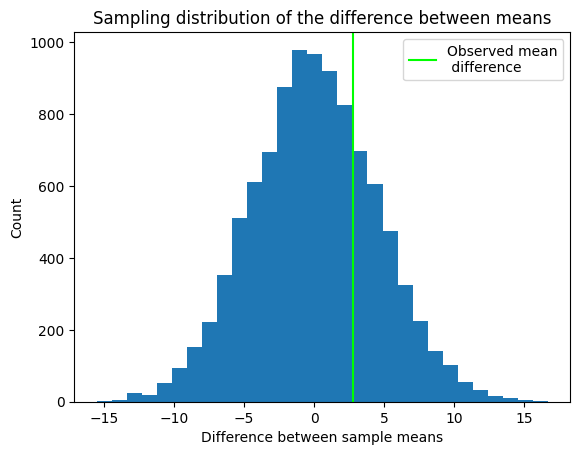

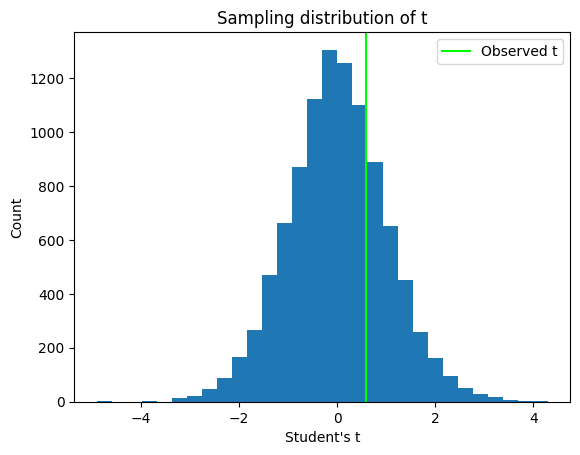

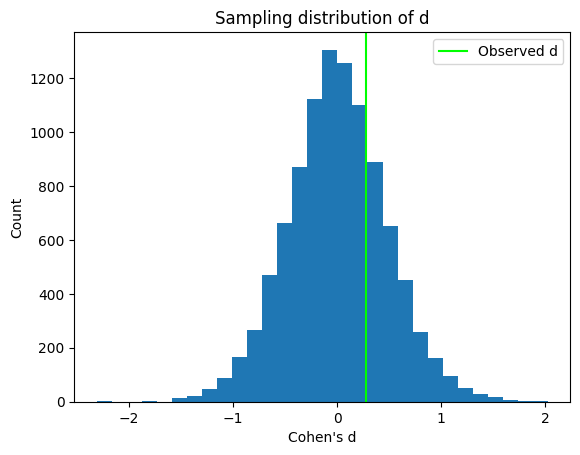

p value (mean diff) = 0.5272
p value (d) = 0.5397
p value (t) = 0.5397


In [72]:
# compute null distribution of t
t_distr_null = np.array([t_statistic(sample_a_null[x],sample_b_null[x],correction=True) for x in range(N_REPS)])

# compute null distribution of d
d_distr_null = np.array([cohens_d(sample_a_null[x],sample_b_null[x],correction=True) for x in range(N_REPS)])

obs_t = t_statistic(sample_d,sample_f,correction=True)
obs_d = cohens_d(sample_d,sample_f,correction=True)

# get their p-values from the simulated sampling distributions
p_val_t = np.sum(np.abs(t_distr_null)>np.abs(obs_t)) / N_REPS
p_val_d = np.sum(np.abs(d_distr_null)>np.abs(obs_d)) / N_REPS

# plot sampling distribution of the difference between the means
plt.hist(diff_distr_null,bins = 30)
l1 = plt.axvline(x=xbar_diff,c = [0,1,0])
plt.title('Sampling distribution of the difference between means')
plt.xlabel('Difference between sample means')
plt.ylabel('Count')
plt.legend([l1],['Observed mean\n difference'])
plt.show()

# plot sampling distribution of t
plt.hist(t_distr_null,bins = 30)
l2 = plt.axvline(x=obs_t,c = [0,1,0])
plt.title('Sampling distribution of t')
plt.xlabel('Student\'s t')
plt.ylabel('Count')
plt.legend([l2],['Observed t'])
plt.show()

# plot sampling distribution of t
plt.hist(d_distr_null,bins = 30)
l3 = plt.axvline(x=obs_d,c = [0,1,0])
plt.title('Sampling distribution of d')
plt.xlabel('Cohen\'s d')
plt.ylabel('Count')
plt.legend([l3],['Observed d'])
plt.show()

print('p value (mean diff) = ' + str(p_val_mean_diff))
print('p value (d) = ' + str(p_val_d))
print('p value (t) = ' + str(p_val_t))


The reason that *t* is used in practice is that its sampling distribution can be expressed mathematically:

$$f(t,v) = \frac{\Gamma((v+1)/2)}{ \sqrt{\pi v}\Gamma(v/2) }(1 + t^{2}/v)^{-(v+1)/2}$$

Where $v$ is the *degrees of freedom*, in our case equal to the sum of the two (corrected) sample sizes and $\Gamma$ is the gamma function. Therefore the p-value could be computed exactly without a computer.

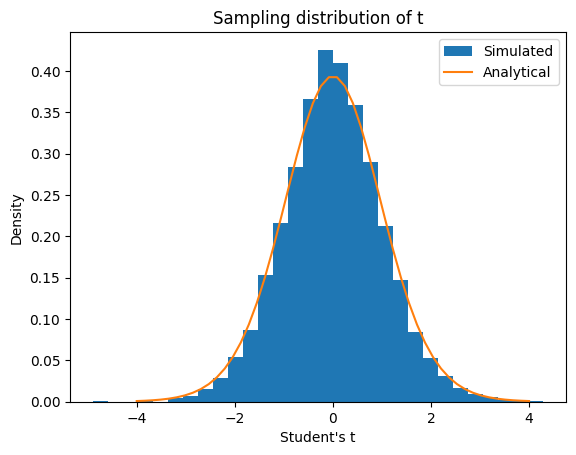

In [73]:
# plot the simulated sampling distribution overlayed with the analytical on
def t_sampling_distr_pdf(t,v):
    # calculate the first fraction
    return math.gamma( (v+1) / 2 ) / (np.sqrt(math.pi * v) * math.gamma(v/2)  ) *\
        np.power((1+t**2/v),-(v+1)/2)

def get_degrees_of_freedom(x1,x2,correction=False):
    return get_n(x1,correction=correction) + get_n(x2,correction=correction)

# plot simulated sampling distribution
plt.hist(t_distr_null,bins=30,density = True,label='Simulated') # plot

# plot analytical
t = np.linspace(-4,4,50)
pdf = t_sampling_distr_pdf(t,get_degrees_of_freedom(sample_d,sample_f))
plt.plot(t,pdf,label = 'Analytical')
plt.title('Sampling distribution of t')
plt.xlabel('Student\'s t')
plt.ylabel('Density')
plt.legend()
plt.show()

## Statistical inference: the Bayesian perspective
### A motivation
From the frequentist perspective we reject the null hypothesis as a plausible explanation of our data if the p-value (probability of observing a value of the test statistic **if the null hypothesis was true** is as or more extreme than the observed one) is less than a specified threshold (usually by convention .05). This result is normally said to *statistically significant*

As we noted before, the p value for our experiment is greater than this threshold. Therefore, we cannot reject the null hypothesis. So what can we conclude?

Well we can say that our observed difference could have occurred even if there was no difference between the populations ... but not much else.
Importantly we *cannot* conclude:
   - that there **is no** difference between the **population** means (you can see, since the simulated **population** means are different, that this would be a false conclusion anyway) OR
   - that there is a difference in the **population** means.

 Indeed this is a major weakness of frequentist methods, namely that *non-significant findings cannot really be interpreted in a scientifically satisfying or practically very useful way*. Researchers often implicitly (and sometimes even explicitly) conflate the absence of evidence of an effect (a non-significant p-value) with evidence for the absence of an effect. You may have heard statements like "there is no significant difference between group A and group B" in the reporting of a non-significant finding. This is not exactly a wrong statement but is often said disingenuously to non-experts with the intention of communicating that the study supports the conclusion that there is no difference between the groups. Which it doesn't.

Anyone who has tried will also know that non-significant such results are hard to publish. I would argue therefore, that clinging to the frequentist paradigm indirectly incentivises misconduct such as ['p-hacking'](https://en.wikipedia.org/wiki/Data_dredging) and contributes to bias in the scientific literature via the ["file-drawer" effect](https://research.uh.edu/the-big-idea/what-went-wrong/behind-closed-drawers-the-file-drawer-effect/).

Even if for no other reason, it is worth considering the Bayesian alternative to the 'p-value'...

### The default Bayes' Factor
The so-called default Bayes' factor is a ratio of two probabilities:

$$ \frac{P(data | H_{A})}{P(data | H_{0})} $$

The numerator is the probability of observing our data under the null hypothesis, and the denominator is the probability of observing our data under the alternative hypothesis.

Simply, the Bayes' factor measures the relative strength of the evidence for the alternative (research) hypothesis and the null hypothesis. Perhaps you can already see that, in contrast to the frequentist approach, using a Bayesian approach, it becomes quite possible to conclude in favour of **either** the null hypothesis or the alternative hypothesis. It also becomes possible to know if the data are simply inconclusive and maybe one needs to rethink the experiment or collect [more data](https://doi.org/10.31234/osf.io/5ntkd).

### Simulation overview and rationale
As I mentioned in the introduction the idea for this simulation was borrowed from [this paper](https://doi.org/10.1177/2515245920972624), which I highly recommend. The idea is to show, with the bare minimum of maths the intuition behind the Bayes' Factor for hypothesis testing.

It is convenient from here on to state our null and alternative hypotheses in terms of the effect-size **in the population**. This is notated $\delta$ to distinguish it from it's observed value in the sample Cohen's $d$. This is, as explained above, the difference between the  means normalised by the square root of the pooled variance. So the null hypothesis of no difference between the population means, can be re-stated as $\delta$ equalling zero and the alternative as $\delta$ not equalling zero.

$$ H_{0}: \delta=0 $$
$$ H_{A}: \delta\neq0 $$

In our case specifically, the numerator and denominator of the Bayes' factor $P(data | H_{A})$ and $P(data | H_{0})$ should be understood as the probability of obtaining *our observed value of Cohen's $d$* under the alternative and null hypothese, respectively. In our simulation, we approximate each element $P(data | H_{A})$ and $P(data | H_{0})$ in the same way:
1. We draw many random samples from simulated populations where the **population** effect size $\delta$ is consistent with the hypothesis ($H_{0}$ or $H_{A}$).
2. For each **sample** we calculate Cohen's $d$.
3. We calculate the proportion of times these values are very close to our observed value of Cohen's $d$.

### The prior distributions
Before we can begin we need to decide what are plausible values of the population effect size $\delta$ under each hypothesis. Our expectations are modelled by two *prior distributions*, one attached to each of the two hypotheses, that reflect our concept of how probable different values of $\delta$ are. For the null hypothesis we select a 'point prior' with its total mass at 0. For the alternative we select a Cauchy prior with scale equal to .707. We will just quickly plot these two distributions before going any further.

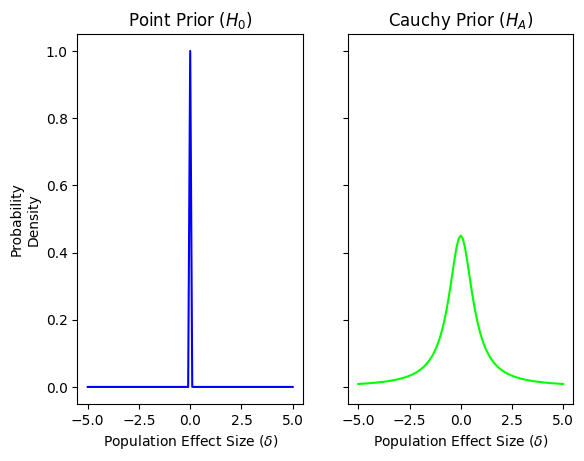

In [74]:
# set some colors for plotting, associated with each hypothesis
NULL_COLOR = [0,0,1]
ALT_COLOR = [0,1,0]

def evaluate_prior(delt,type='point'):
    """ Evaluates the prior distribution for the given value of delta (delt)
    """
    if type=='point':
        y = np.zeros_like(delt)
        y[np.isclose(delt,0.)] = 1. # assign 1 to zero values
        return y
    elif type == 'cauchy':
        return scpst.cauchy.pdf(delt,loc=0,scale=np.sqrt(2)/2)

# values of delta to plot
delts = np.linspace(-5,5,101)

# evaluate each prior for the specified values of delta
y_point = evaluate_prior(delts,'point')
y_cauch = evaluate_prior(delts,'cauchy')

# set up plots
f, axs = plt.subplots(1,2,sharex=True, sharey=True)

# plot point prior in the first axis
axs[0].plot(delts,y_point,c=NULL_COLOR)
axs[0].set_xlabel(r'Population Effect Size ($\delta$)')
axs[0].set_title(r'Point Prior ($H_{0}$)')
axs[0].set_ylabel('Probability\nDensity')

# plot Cauchy prior in the second axis
axs[1].plot(delts,y_cauch,c=ALT_COLOR)
axs[1].set_xlabel(r'Population Effect Size ($\delta$)')
axs[1].set_title('Cauchy Prior ($H_{A}$)')
plt.show()

The choice of a point prior with all its mass at zero is the only viable choice for the null hypothesis. This is because the null hypothesis specifies that the effect size is exactly zero. In contrast, the alternative hypothesis specifies only that $\delta$ is not zero. In the absence of particular prior knowledge, the Cauchy prior specified above has caught on as a good default choice for the Bayesian t-test. It has some neat mathematical properties, as discussed [in this paper](https://doi.org/10.1214/18-BA1103). One can also note, from casual inspection, that it attaches higher probability to smaller effect sizes reflecting the general trend in natural and social sciences towards smaller effect sizes. Specifically with the specified scale $\sqrt{2}/2 = 0.707$ 50% of the distribution lies within $\pm 0.707$. While this varies by domain, effect sizes outside this range are generally considered quite large and occur relatively infrequently in practice. Further, the Cauchy distribution has fat tails and approaches zero slowly, reflecting  our lack of specific prior knowledge, acknowledging that larger effect sizes are possible.

### Prior predictive distributions
Having modelled our expectations as to what values of the **population** effect size $\delta$ are plausible under each hypothesis in the form of two prior distributions, we can begin the simulation proper.

We sample from each prior distribution 10 000 population effect sizes $\delta$. In the case of the point prior this is always 0. For each population effect size we draw samples from two independent populations, with sample sizes equal to our experimental Dutch and Flemish samples. These populations are simulated so that the the **population** means are consistent with the population effect size. We then calculate the **sample** effect size Cohen's $d$.

The resulting distributions are so-called *prior predictive* distributions and reflect the relative probability of different values of the **sample** effect size under each of the two hypotheses.

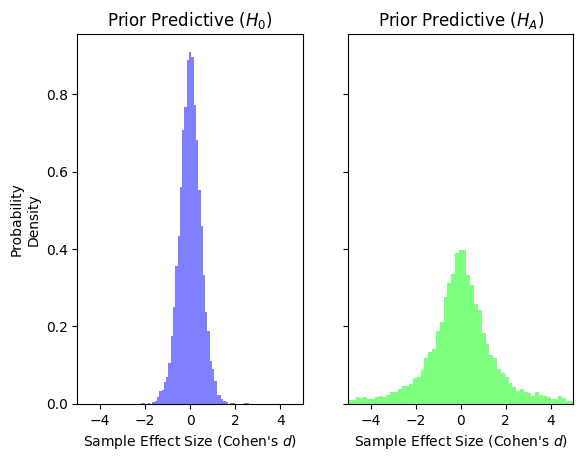

In [75]:
def sample_delta_from_prior(distr_type):
    """
    Randomly sample a value of the population effect size delta from one of the prior distributions
    """
    if distr_type == 'point':
        return 0 # return always 0
    if distr_type == 'cauchy':
        # draw a random sample from a cauchy distribution
        sample = scpst.cauchy.rvs(loc=0,scale=np.sqrt(2)/2,size=1)
        return sample

def sample_from_independent_pops(delta,n1,n2,pooled_var=1):
    """
    Draw two samples of sizes n1 and n2 from two populations, where the difference between the population means is consistent with the specified population effect size 'delta'. 'pooled_var' specifies the pooled variance
    """
    # set up population mean and variance consistent with the pop effect size
    mu2 = 0.
    mu1 = delta*np.sqrt(pooled_var)

    sd1 = np.sqrt(pooled_var)
    sd2 = np.sqrt(pooled_var)

    # draw samples
    sample1 = rng.normal(loc=mu1,scale=sd1,size=n1)
    sample2 = rng.normal(loc=mu2,scale=sd2,size=n2)
    return sample1, sample2


N_SAMPLES = 10000 # how many times to repeat the experiment
cohens_d_null = np.zeros(N_SAMPLES)
cohens_d_alternative = np.zeros(N_SAMPLES)
####### calculate d 10000 times under the null hypothesis
for i in range(N_SAMPLES):
    # sample population delta from prior distribution - this will always be zero for the 'point' prior
    delta = sample_delta_from_prior('point')
    # draw two samples from two populations consistent with this effect size - in the case of the null these are populations with identical means
    sim_a,sim_b = sample_from_independent_pops(delta,n_d,n_f)
    # compute the observed sample d
    cohens_d_null[i] = cohens_d(sim_a,sim_b,correction=True)
####### calculate d 10000 times under the alternative hypothesis
for i in range(N_SAMPLES):
    # sample population delta randomly from Cauchy prior
    delta = sample_delta_from_prior('cauchy')
    # draw two samples from two populations consistent with this effect size
    sim_a,sim_b = sample_from_independent_pops(delta,n_d,n_f)
     # compute the observed sample d
    cohens_d_alternative[i] = cohens_d(sim_a,sim_b,correction=True)

# plot the distributions of sampled values of d
f, axs2 = plt.subplots(1,2,sharex=True,sharey=True)
null_h,null_b,_,=axs2[0].hist(cohens_d_null,bins = np.linspace(-3,3,60),color=NULL_COLOR,alpha=0.5,density=True)
axs2[0].set_xlabel(r"Sample Effect Size (Cohen's $d$)")
axs2[0].set_title(r'Prior Predictive ($H_{0}$)')
alt_h,alt_b,_=axs2[1].hist(cohens_d_alternative,bins = np.linspace(-5,5,60),color=ALT_COLOR,alpha=0.5,density=True)
axs2[1].set_xlabel(r"Sample Effect Size (Cohen's $d$)")
axs2[1].set_title('Prior Predictive ($H_{A}$)')
axs2[0].set_ylabel('Probability\nDensity')

plt.xlim([-5,5])
plt.show()

The probability of a given value of Cohen's $d$ under the null hypothesis $P(data | H_{0})$ is approximated by the height of the bar in the left panel that is closest to that value. It's probability under the alternative hypothesis $P(data | H_{A})$ is the height of the corresponding bar in the right panel. The Bayes' factor is then the ratio of these two value.

E.g. for Cohen's d we actually observed in our experiment...

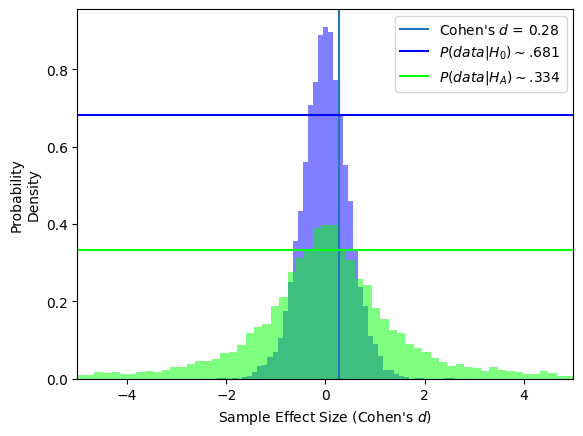

BF (Histogram Approximation)
BF = 0.490
Observed d is 2.043 times more likely given the Null hypothesis than the Alternative


In [76]:
def get_bf_from_histogram(observed_d,height_null,null_bins,height_alt,alt_bins):
    """
    Get approximate Bayes' factor for the observed value of Cohen's d from the heights of the two prior predictive histograms.
    """

    # convert bin edges to bin centers
    def bin_edges_to_centers(edges):
        bw = edges[1]-edges[0]
        return edges[:-1] + bw /2

    null_bins = bin_edges_to_centers(null_bins)
    alt_bins = bin_edges_to_centers(alt_bins)

    # get the height of the bin whose center is nearest to the observed d for the null prior predictive distribution
    i = np.argmin(np.abs(null_bins-observed_d))
    pr_0 = height_null[i]

     # get the height of the bin whose center is nearest to the observed d for the alternative prior predictive distribution
    j = np.argmin(np.abs(alt_bins-observed_d))
    pr_a = height_alt[j]
    return pr_a /pr_0, pr_a, pr_0

def print_result(bf_a0):
    """Print a message describing the given Bayes' Factor """
    if bf_a0<1.:
        supported_hyp = 'Null'
        unsupported_hyp = 'Alternative'
        fact = 1/bf_a0
    if bf_a0>1.:
        supported_hyp = 'Alternative'
        unsupported_hyp = 'Null'
        fact = bf_a0
    print('BF = '+ '%.3f'%bf_a0)
    print('Observed d is '+ '%.3f'%fact +' times more likely given the '+
          supported_hyp+' hypothesis than the '+ unsupported_hyp)

# get approximate probabilities and the BF from the histograms
bf_hist_approx,pr_a,pr_0  = get_bf_from_histogram(obs_d,null_h,null_b,alt_h,alt_b)

# plot the two histograms overlayed with indications of the selected bins
plt.hist(cohens_d_null,bins = np.linspace(-3,3,60),color=NULL_COLOR,alpha=0.5,density=True)
plt.xlabel(r"Sample Effect Size (Cohen's $d$)")
plt.ylabel('Probability\nDensity')
plt.hist(cohens_d_alternative,bins = np.linspace(-5,5,60),color=ALT_COLOR,alpha=0.5,density=True)
plt.xlim([-5,5])

# add a vertical line at the observed Cohen's d
plt.axvline(x=obs_d,label=r"Cohen's $d$ = "+'%.2f'%obs_d)
# add a horizontal line at the height of pr_a
pr0_lh=plt.axhline(y=pr_0,color=NULL_COLOR,label=r'$P(data | H_{0}) \sim $'+('%.3f'%pr_0)[1:])
pra_lh = plt.axhline(y=pr_a,color=ALT_COLOR,label=r'$P(data | H_{A}) \sim $'+('%.3f'%pr_a)[1:])

plt.legend()
plt.show()
print('BF (Histogram Approximation)')
print_result(bf_hist_approx)


We can see that our observed $d$ is about twice as likely under the null hypothesis. So the data, as they stand, favour the conclusion of no difference in height between the Dutch and Flemish Belgians. But not by much. In fact, in practice one would not conclude in favour of either hypothesis with a Bayes' factor of this size. In this case one can conclude firmly that the data, as they are, are inconclusive.